### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

Il modello di Ising fornisce un buon metodo per descrivere l’Hamiltoniana di un sistema di spin interagenti tra loro e con un campo esterno al sistema. L’Hamiltoniana di un sistema 1D ha la forma:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

Dove $\mu_B=1$, $k_B=1$, $J$ è l’interazione tra due spin primi vicini, $h$ è il campo esterno, $s_i$ sono gli spin ($\scriptsize{\pm 1}$) e valgono le condizioni periodiche al contorno $s_{N+1} = s_1$.

Per simulare un sistema tipo Ising è utile utilizzare una simulazione Metropolis. Infatti, dal momento che il problema riguarda la meccanica statistica e gli spin seguono un distribuzione di Maxwell-Boltzman, con questo algoritmo siamo in grado di evadere dalla difficoltà di calcolo della funzione di partizione.
Per inciso, quest’ultima sarebbe calcolabile analiticamente in una dimensione senza grosse difficoltà, tuttavia per dimensioni superiori il calcolo si complica ulteriormente e per dimensioni > 2 non è ancora stato risolto.

In questo esercizio ho completato un codice giù in parte implementato, in modo da calcolare significative proprietà magnetiche e termodinamiche di un modello di Ising mono dimensionale utilizzando due metodi differenti: l’algorito di Metropolis e quello di Gibbs. Illustro come li ho implementati nel codice. 

*Metropolis*  
Come detto prima, gli spins seguono una distribuzione $p(\{ s_i \}) \propto e^{-\beta H}$, perciò il rapporto tra la nuova e vecchia configurazione è $\frac{P_{new}}{P_{old}} = e^{-\beta \Delta H}$, con $\Delta H = H_{new} - H_{old}$.
In questo sistema la mossa proposta è il flip di uno spin. Poniamo sia selezionato lo spin $s_j$, allora l'energia è:  
$H_{old} =  -J\,s_j (s_{j-1} + s_{j+1}) -J\sum_{i=1, i\neq j-1, i\neq j}^N s_i s_{i+1} -h s_j-h\sum_{i=1, i\neq j}^N s_i$  
quando avviene il flip $s_j \to-s_j$  
$H_{new} =  -J (-s_j) (s_{j-1} + s_{j+1}) -J\sum_{i=1, i\neq j-1, i\neq j}^N s_i s_{i+1} -h (-s_j)-h\sum_{i=1, i\neq j}^N s_i$  
perciò, visto che le due sommatorie non dipendono da $s_j$:
$\Delta H = 2\,J\,s_j ( s_{j-1} + s_{j+1} + h)$

*Gibbs*  
L'algoritmo di Gibbs è un metodo di campionamento basato su una catena di Markov dove il valore campionato (in questo caso uno spin) è scelto tra i possibili valori che può assumere ($\scriptsize{\pm 1}$) con probabilità:
$$p\left(s_k'|\left\{s_j : j\neq k\right\}\right) = \frac {p(s_k')}{p(+1)\,+\,p(-1)}$$
dove $p(s_i)$ è la probabilità di avere lo spin $s_k'$ in una data configurazione di spins.
Perciò in questo caso, data la configurazione di spins, uno spin random $s_k'$ ha probabilità $s_k' = 1$ pari a:  
$p\left(1|\left\{s_j : j\neq k\right\}\right) = \frac {p(+1)}{p(+1)\,+\,p(-1)} = \frac{1}{1 + \frac {p(-1)}{p(+1)}}$  
e, usando gli stessi risultati trovati per Metropolis con $s_j = 1$ : 
$\frac {p(-1)}{p(+1)} = \exp \left\{-\beta\,2\,J\,( s_{j-1} + s_{j+1} + h)\right\}$


Dopo aver implementato i due metodi di campionamento ho aggiunto il calcolo per la capacità termica per spin ($C(N,T)$), la suscettività magnetica per spin ($\chi(N,T)$), la magnetizzazione per spin ($M(N,T,h)$) nel seguente modo: 
1. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
2. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
3. $M(N,T)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Infine per rendere più leggibile il codice e implementare al meglio l'equilibrazione del sistema, ho manipolato il file di input Input.dat inserendo: 
- un parametro *restart* che consente di incominciare da una configurazione di spin casuali o dall'ultima configurazione registrata nell'esecuzione precedente.
- un parametro *metro* che consente di scegliere se effettuare il campionamento degli spin tra il metodo Gibbs o quello Metropolis.


Ora, per determinare dopo quanti steps il sistema risulta essere  equilibrato ho analizzato il valore di alcune grandezze termodinamiche. Quando il grafico di tali grandezze in funzione degli steps MC smette di avere un trend e si stabilizza attorno ad un certo valore, significa che l'equilibrazione del sistema è stata raggiunta. 
Per inciso, in questo problema per equilibrazione si intende che la probabilità media di trovare il sistema in un particolare stato $\mu$ è proporzionale al peso di Boltzman $p(\mu$), segno del fatto che l'algoritmo sta campionando correttamente la distribuzione $p(\mu)$.


Per quanto appena detto, nei seguenti grafici ho riportato il valore medio per blocco di due grandezze termodinamiche in funzione del numero di blocchi fissando prima T a 2.0 K e poi T a 0.5 K. Ho impostato 100 blocchi, ciascuno di 1000 steps.
Noto che il sistema raggiunge l'equilibrio in circa 40 blocchi, ossia 40000 steps, sia per Metropolis che per Gibbs.

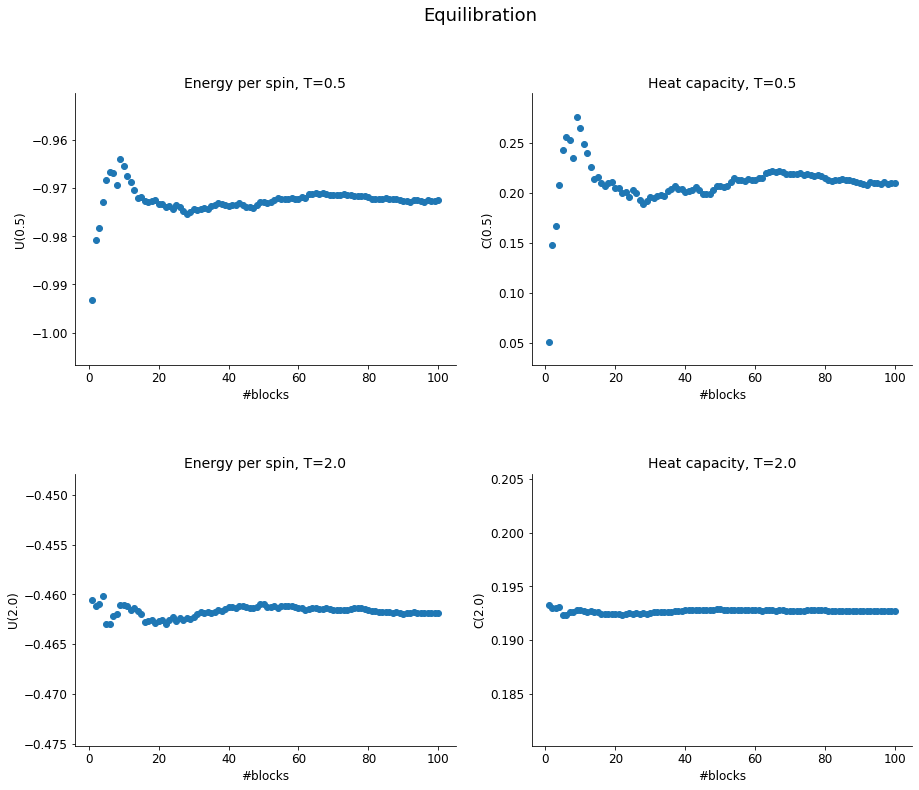

In [2]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f, axarr = plt.subplots (2,2, figsize=(15,12))
f.suptitle("Equilibration")
#T=0.5
blk, nrg, err = np.loadtxt ("./ISING_1D/equilibrazione/output.ene.T05.dat", usecols=(0, 2,3),unpack= True)
axarr[0,0].scatter(blk, nrg)
axarr[0,0].set_title("Energy per spin, T=0.5")
axarr[0,0].set_xlabel("#blocks")
axarr[0,0].set_ylabel("U(0.5)")

heat, err = np.loadtxt ("./ISING_1D/equilibrazione/output.heat.T05.dat", usecols=(2, 3), unpack= True)
axarr[0,1].scatter(blk, heat)
axarr[0,1].set_title("Heat capacity, T=0.5")
axarr[0,1].set_xlabel("#blocks")
axarr[0,1].set_ylabel("C(0.5)")

#T= 2.0
blk, nrg, err = np.loadtxt ("./ISING_1D/equilibrazione/output.ene.T2.dat", usecols=(0, 2,3), unpack= True)
axarr[1,0].scatter(blk, nrg)
axarr[1,0].set_title("Energy per spin, T=2.0")
axarr[1,0].set_xlabel("#blocks")
axarr[1,0].set_ylabel("U(2.0)")

heat, err = np.loadtxt ("./ISING_1D/equilibrazione/output.heat.T2.dat", usecols=(2, 3), unpack= True)
axarr[1,1].scatter(blk, heat)
axarr[1,1].set_title("Heat capacity, T=2.0")
axarr[1,1].set_xlabel("#blocks")
axarr[1,1].set_ylabel("C(2.0)")
plt.show()

Dopo aver equilibrato il sistema eseguo le simulazioni per il calcolo delle grandezze termodinamiche richieste. 
Il codice viene eseguito in modo che la configurazione iniziale sia caricata dal file config.final contenete l'ultima configurazione del sistema di spin registrata durante la fase di equilibrazione. 
Scansiono l'intervallo di temperature [0.5, 2] in 10 parti, così da eseguire la misura delle grandezze termodinamiche su 9 valori di T differenti e apprezzare l'andamento delle grandezze in funzione di T. Il valore della grandezza termodinamiche per ogni T è l'ultimo valore della media a blocchi prodotto con il data blocking.

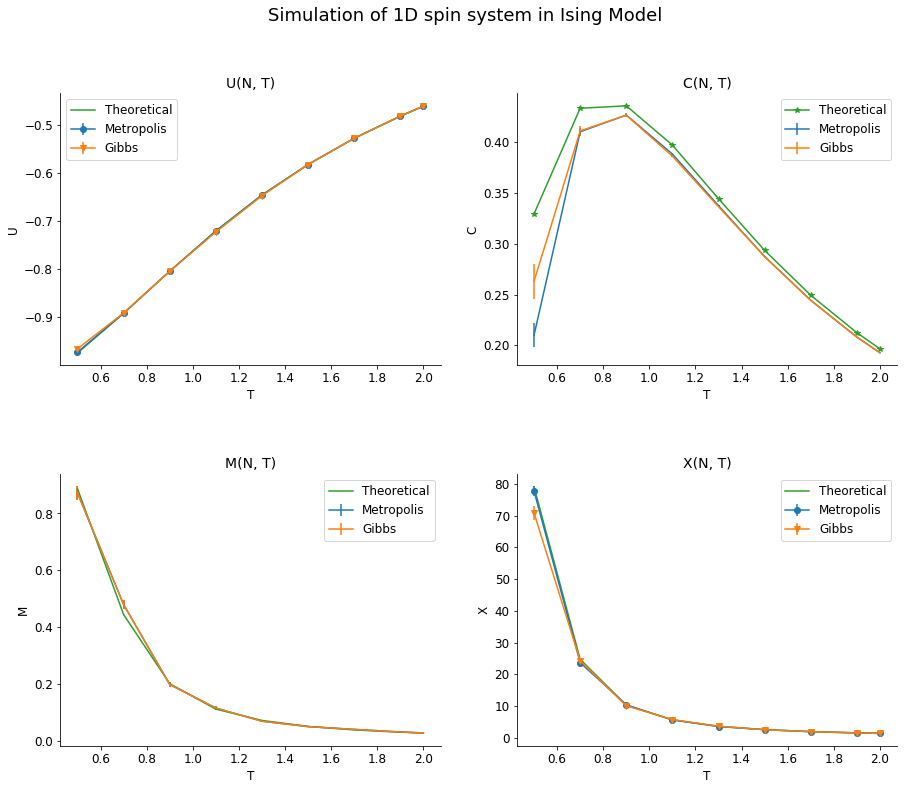

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
f, axarr = plt.subplots (2,2, figsize=(15,12))
f.suptitle("Simulation of 1D spin system in Ising Model")

T = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.0]
beta = [1/0.5, 1/0.7, 1/0.9, 1/1.1, 1/1.3, 1/1.5, 1/1.7, 1/1.9, 1/2.0]
J = 1.0
Ns = 50.0
th = np.tanh(np.asarray(J)/np.asarray(T))
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((np.asarray(beta)*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = np.asarray(beta)*np.exp(2*np.asarray(beta)*J)*(1-thN)/(1+thN)

#energy
(t, u, err) = np.loadtxt ("./ISING_1D/Mfinal.ene.0", usecols=(0, 1, 2), unpack= True)
(uG, errG) = np.loadtxt ("./ISING_1D/Gfinal.ene.0", usecols=(1, 2), unpack= True)

axarr[0,0].errorbar(t, u, err, label= "Metropolis", marker='o')
axarr[0,0].errorbar(t, uG, yerr=errG, label= "Gibbs", marker='v')
axarr[0,0].plot(T, e, label="Theoretical")

axarr[0,0].set_title("U(N, T)")
axarr[0,0].set_xlabel("T")
axarr[0,0].set_ylabel("U")
axarr[0,0].legend()

#heat capacity
(t, heatM, err) = np.loadtxt ("./ISING_1D/Mfinal.heat.0", usecols=(0, 1, 2), unpack= True)
(heatG, errG) = np.loadtxt ("./ISING_1D/Gfinal.heat.0", usecols=(1, 2), unpack= True)

axarr[0,1].errorbar(t, heatM, err, label= "Metropolis")
axarr[0,1].errorbar(t, heatG, yerr=errG, label= "Gibbs")
axarr[0,1].plot(T, heat, label="Theoretical", marker='*')

axarr[0,1].set_title("C(N, T)")
axarr[0,1].set_xlabel("T")
axarr[0,1].set_ylabel("C")
axarr[0,1].legend()

#magnetization
(t, magM, err) = np.loadtxt ("./ISING_1D/Mfinal.mag.0", usecols=(0, 1, 2), unpack= True)
(magG, errG) = np.loadtxt ("./ISING_1D/Mfinal.mag.0", usecols=(1, 2), unpack= True)

h=0.02 #external field
b=np.asarray(beta)
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


axarr[1,0].errorbar(t, magM, err, label= "Metropolis")
axarr[1,0].errorbar(t, magG, yerr=errG, label= "Gibbs")
axarr[1,0].plot(T, M, label="Theoretical")

axarr[1,0].set_title("M(N, T)")
axarr[1,0].set_xlabel("T")
axarr[1,0].set_ylabel("M")
axarr[1,0].legend()

#susceptibility
(t, suscM, err) = np.loadtxt ("./ISING_1D/Mfinal.chi.0", usecols=(0, 1, 2), unpack= True)
(suscG, errG) = np.loadtxt ("./ISING_1D/Gfinal.chi.0", usecols=(1, 2), unpack= True)

axarr[1,1].errorbar(t, suscM, err, label= "Metropolis", marker='o')
axarr[1,1].errorbar(t,suscG, yerr=errG, label= "Gibbs", marker='v')
axarr[1,1].plot(T, X, label="Theoretical")

axarr[1,1].set_title("X(N, T)")
axarr[1,1].set_xlabel("T")
axarr[1,1].set_ylabel("X")
axarr[1,1].legend()

plt.show()